In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [25]:
X,y = make_moons(100, noise=0.25, random_state=2)

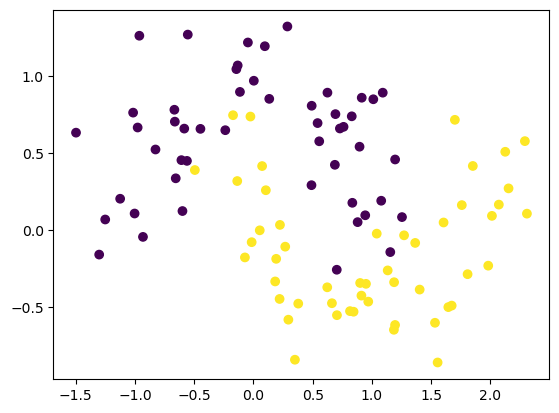

In [27]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [29]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
adam = Adam(learning_rate=0.01)
model1.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
history = model1.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 34s 3ms/step


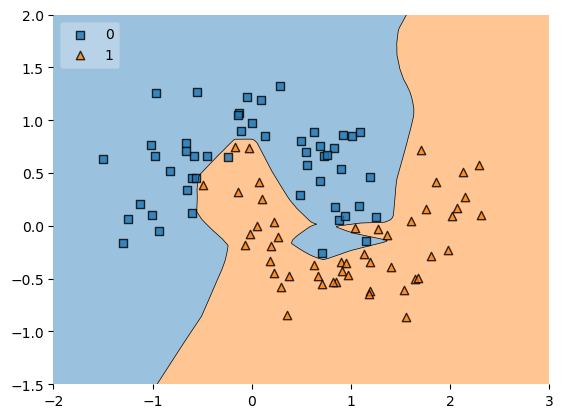

In [33]:
plot_decision_regions(X, y.astype("int"), clf=model1, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

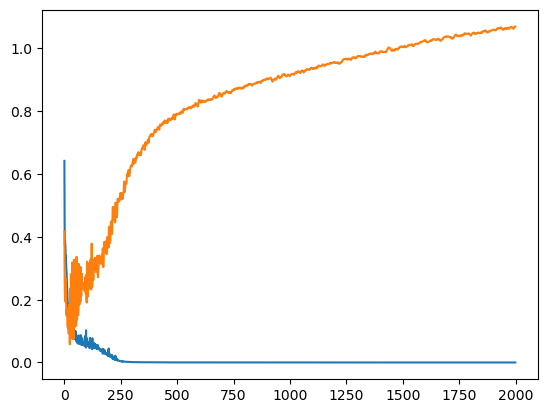

In [35]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

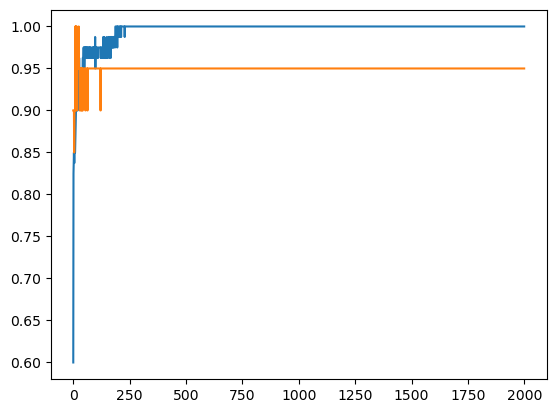

In [39]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [43]:
model = Sequential()
model.add(Dense(128, input_dim=2, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model.add(Dense(128, activation="relu", kernel_regularizer=tf.keras.regularizers.l1(0.001)))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               384       
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
adam = Adam(learning_rate=0.01)
model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
history = model.fit(X, y, epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 10s 1ms/step


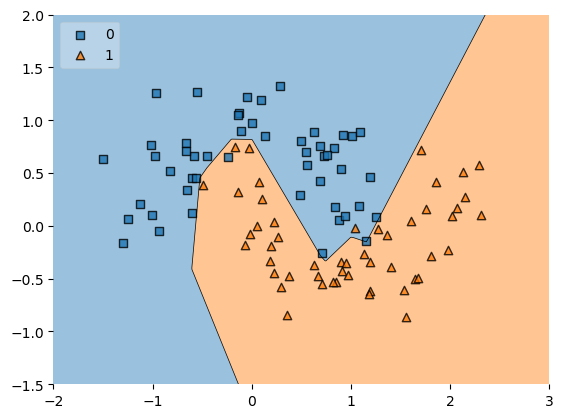

In [89]:
plot_decision_regions(X, y.astype("int"), clf=model, legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

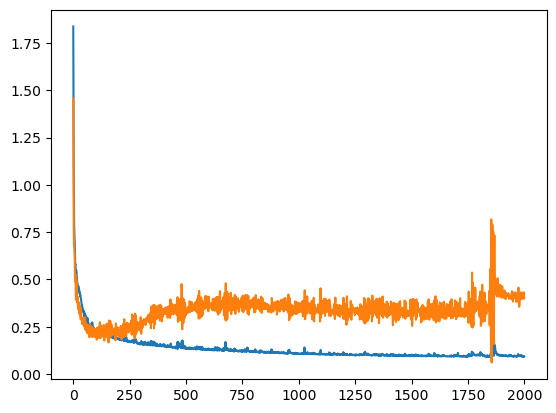

In [91]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

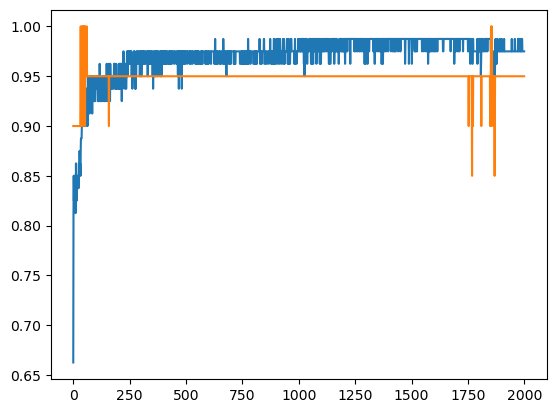

In [51]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [63]:
model1.get_weights()[0].shape

(2, 128)

In [65]:
model.get_weights()[0].shape

(2, 128)

In [69]:
model1_weights_layer1 = model1.get_weights()[0].reshape(256)
model2_weights_layer1 = model.get_weights()[0].reshape(256)

<Axes: >

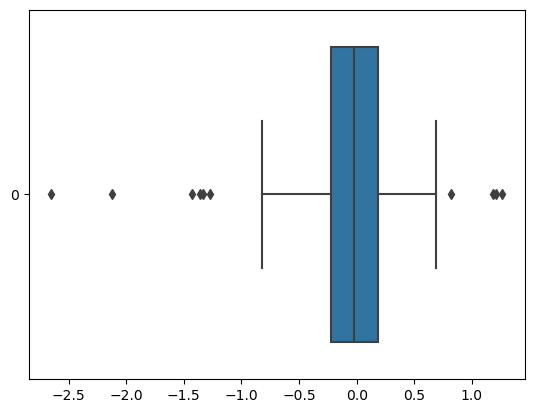

In [93]:
sns.boxplot(model1_weights_layer1, orient="h")

<Axes: >

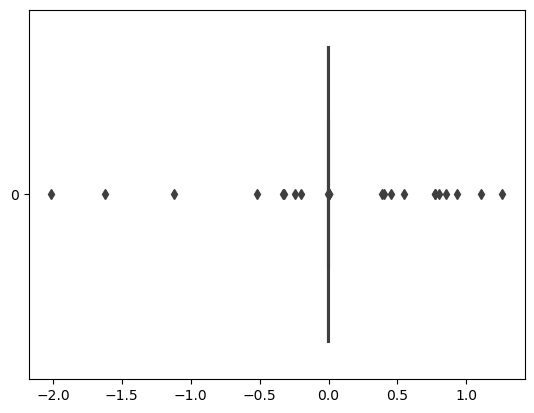

In [95]:
sns.boxplot(model2_weights_layer1, orient="h")

In [77]:
model1_weights_layer1.min()

-2.651874

In [79]:
model2_weights_layer1.min()

-2.0129101

C:\Users\atif\AppData\Local\Temp\ipykernel_2436\223381317.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weights_layer1)
C:\Users\atif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\atif\AppData\Local\Temp\ipykernel_2436\223381317.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibili

<Axes: ylabel='Density'>

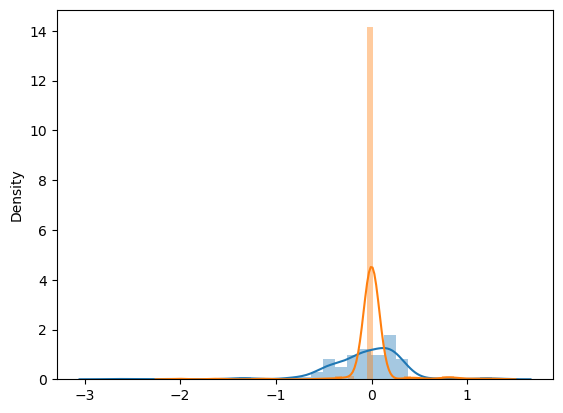

In [85]:
sns.distplot(model1_weights_layer1)
sns.distplot(model2_weights_layer1)

In [97]:
# Do it with l2 regularization which gives you better results